### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [3]:
todas = pd.concat([tienda, tienda2, tienda3, tienda4])


In [4]:
ingresos = todas.groupby("Tienda")["Precio"].sum().astype(int)
ingresos

,Precio
Tienda,
Tienda 1,1150880400
Tienda 2,1116343500
Tienda 3,1098019600
Tienda 4,1038375700


# 2. Ventas por categoría

In [5]:
categoria_ventas = todas.groupby(["Tienda", "Categoría del Producto"])["Producto"].count()
categoria_ventas

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar    171
          Deportes y diversión       284
          Electrodomésticos          312
          Electrónicos               448
          Instrumentos musicales     182
          Juguetes                   324
          Libros                     173
          Muebles                    465
Tienda 2  Artículos para el hogar    181
          Deportes y diversión       275
          Electrodomésticos          305
          Electrónicos               422
          Instrumentos musicales     224
          Juguetes                   313
          Libros                     197
          Muebles                    442
Tienda 3  Artículos para el hogar    177
          Deportes y diversión       277
          Electrodomésticos          278
          Electrónicos               451
          Instrumentos musicales     177
          Juguetes                   315
          Libros                     185
          Muebles                    499
Tienda 4  Artículos para el hogar    201
          Deportes y diversión       277
          Electrodomésticos          254
          Electrónicos               451
          Instrumentos musicales     170
          Juguetes                   338
          Libros                     187
          Muebles                    480
Name: Producto, dtype: int64

In [6]:
categoria_ventas.sort_values(ascending=False)


Tienda    Categoría del Producto 
Tienda 3  Muebles                    499
Tienda 4  Muebles                    480
Tienda 1  Muebles                    465
Tienda 4  Electrónicos               451
Tienda 3  Electrónicos               451
Tienda 1  Electrónicos               448
Tienda 2  Muebles                    442
          Electrónicos               422
Tienda 4  Juguetes                   338
Tienda 1  Juguetes                   324
Tienda 3  Juguetes                   315
Tienda 2  Juguetes                   313
Tienda 1  Electrodomésticos          312
Tienda 2  Electrodomésticos          305
Tienda 1  Deportes y diversión       284
Tienda 3  Electrodomésticos          278
Tienda 4  Deportes y diversión       277
Tienda 3  Deportes y diversión       277
Tienda 2  Deportes y diversión       275
Tienda 4  Electrodomésticos          254
Tienda 2  Instrumentos musicales     224
Tienda 4  Artículos para el hogar    201
Tienda 2  Libros                     197
Tienda 4  Libros                     187
Tienda 3  Libros                     185
Tienda 1  Instrumentos musicales     182
Tienda 2  Artículos para el hogar    181
Tienda 3  Artículos para el hogar    177
          Instrumentos musicales     177
Tienda 1  Libros                     173
          Artículos para el hogar    171
Tienda 4  Instrumentos musicales     170
Name: Producto, dtype: int64

# 3. Calificación promedio de la tienda


In [7]:
calificaciones = todas.groupby("Tienda")["Calificación"].mean()
calificaciones

,Calificación
Tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


In [8]:
calificaciones.round(2)


,Calificación
Tienda,
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# 4. Productos más y menos vendidos

In [9]:
productos = todas.groupby(["Tienda", "Producto"])["Producto"].count()
productos

Tienda    Producto                 
Tienda 1  Ajedrez de madera            49
          Armario                      60
          Asistente virtual            40
          Auriculares                  50
          Auriculares con micrófono    33
                                       ..
Tienda 4  Smartwatch                   39
          Sofá reclinable              47
          TV LED UHD 4K                40
          Tablet ABXY                  45
          Vaso térmico                 48
Name: Producto, Length: 204, dtype: int64

In [10]:
#mas vendido
productos.sort_values(ascending=False)

Tienda    Producto                 
Tienda 2  Iniciando en programación    65
          Microondas                   62
Tienda 4  Cama box                     62
Tienda 2  Batería                      61
Tienda 1  TV LED UHD 4K                60
                                       ..
Tienda 2  Mesa de comedor              34
Tienda 1  Celular ABXY                 33
          Auriculares con micrófono    33
Tienda 4  Guitarra eléctrica           33
Tienda 2  Juego de mesa                32
Name: Producto, Length: 204, dtype: int64

In [11]:
#menos vendido
productos.sort_values()


Tienda    Producto                 
Tienda 2  Juego de mesa                32
Tienda 1  Auriculares con micrófono    33
          Celular ABXY                 33
Tienda 4  Guitarra eléctrica           33
Tienda 2  Mesa de comedor              34
                                       ..
Tienda 1  TV LED UHD 4K                60
Tienda 2  Batería                      61
          Microondas                   62
Tienda 4  Cama box                     62
Tienda 2  Iniciando en programación    65
Name: Producto, Length: 204, dtype: int64

<Axes: xlabel='Tienda,Producto'>

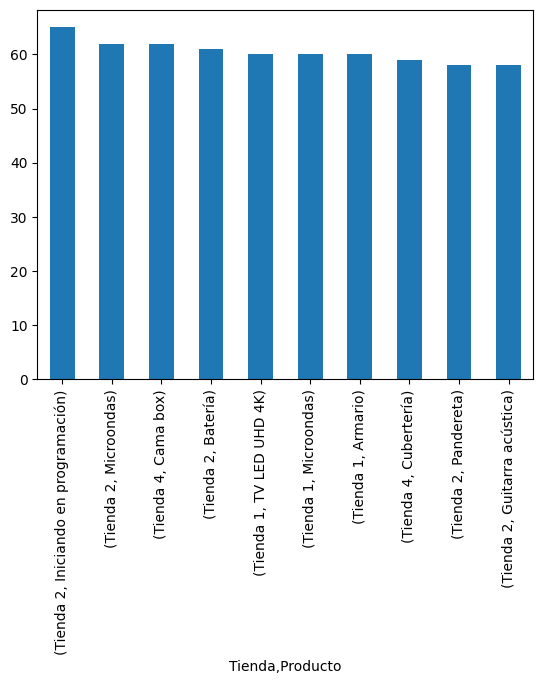

In [12]:
productos.sort_values(ascending=False).head(10).plot(kind="bar")

# 5. Envío promedio por tienda

In [13]:
envio_promedio = todas.groupby("Tienda")["Costo de envío"].mean()
envio_promedio

,Costo de envío
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


In [14]:
envio_promedio.round(2)

,Costo de envío
Tienda,
Tienda 1,26018.61
Tienda 2,25216.24
Tienda 3,24805.68
Tienda 4,23459.46


## **Graficos**

<Axes: title={'center': 'Ingresos por tienda'}, xlabel='Tienda'>

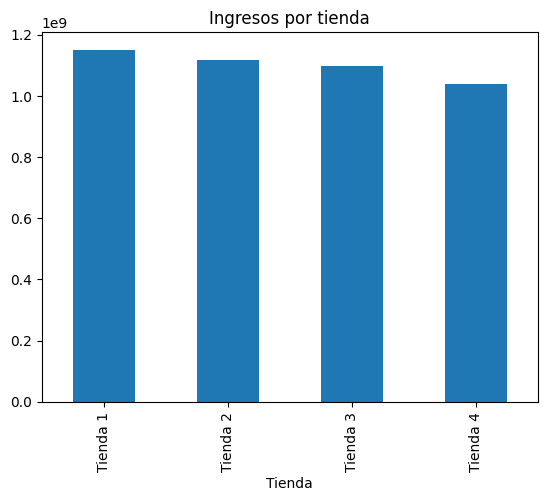

In [15]:
ingresos = todas.groupby("Tienda")["Precio"].sum()

ingresos.plot(kind="bar", title="Ingresos por tienda")

<Axes: title={'center': 'Categorías más vendidas'}, xlabel='Categoría del Producto'>

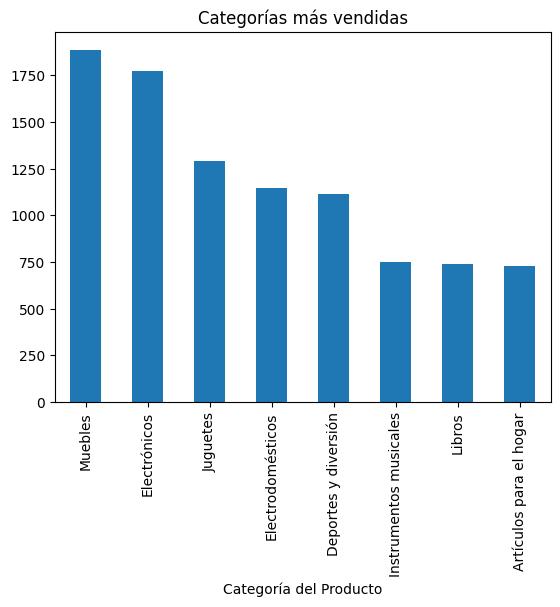

In [17]:
categorias = todas.groupby("Categoría del Producto")["Producto"].count()

categorias.sort_values(ascending=False).head(10).plot(kind="bar", title="Categorías más vendidas")


<Axes: title={'center': 'Calificación promedio por tienda'}, xlabel='Tienda'>

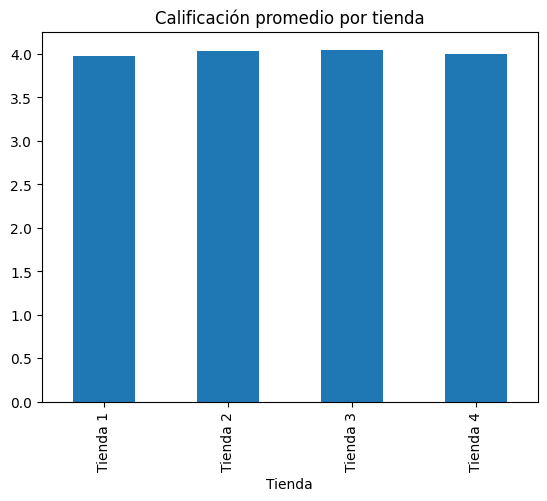

In [19]:
calificaciones = todas.groupby("Tienda")["Calificación"].mean()

calificaciones.plot(kind="bar", title="Calificación promedio por tienda")


**De acuerdo al analisis, el sr. Juan debería quedarse  con la tienda 2, debido a que es la segunda que presenta más ingresos, donde hay productos más vendidos y su calificación es la 2da mejor.**